## Importing the libraries

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('EconomyNextAllNews_with_sentiments.csv')

In [3]:
dataset['sentiment_score'] = dataset['sentiment_score'].round()

In [4]:
dataset.isnull().sum()

Headline            0
Date                0
Industry            0
News Description    0
combined_text       0
sentiment           0
sentiment_score     0
dtype: int64

In [5]:
dataset.head()

Headline        Date  \
0  Sri Lanka needs energy transition law so priva...  2024-05-30   
1  Singapore team to help improve Sri Lanka immig...  2024-05-30   
2  Sri Lanka tourists to get 60-day visa free ent...  2024-05-30   
3  Reyaz Mihular chairman of Sri Lanka's Watawala...  2024-05-30   
4  Sri Lanka rupee opens lower at 301.60/75 to US...  2024-05-30   

                  Industry                                   News Description  \
0                   Energy  Enhance institutional capacity, regulatory fra...   
1                  Economy  Will facilitate Sri Lanka's efforts to moderni...   
2  International Relations  The visa will also allow foreign students of h...   
3              Agriculture  Mihular, a chartered accountant, appointed cha...   
4            Bonds & Forex                           Bond yields were steady.   

                                       combined_text sentiment  \
0  Sri Lanka needs energy transition law so priva...  positive   
1  Singapore team to help improve Sri Lanka immig...  positive   
2  Sri Lanka tourists to get 60-day visa free ent...  positive   
3  Reyaz Mihular chairman of Sri Lanka's Watawala...  positive   
4  Sri Lanka rupee opens lower at 301.60/75 to US...  positive   

   sentiment_score  
0              1.0  
1              1.0  
2              1.0  
3              1.0  
4              1.0

## Label distribution

In [6]:
def plot_percentage(df, column):
    """
    Plots the percentage of values in a specified column of a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The name of the column to plot.
    """
    # Count the occurrences of each unique value
    value_counts = df[column].value_counts()
    
    # Calculate the percentage of each unique value
    percentages = (value_counts / value_counts.sum()) * 100
    
    # Plotting
    plt.figure(figsize=(10, 6))
    percentages.plot(kind='bar', color='skyblue')
    plt.title(f'Percentage of Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.show()

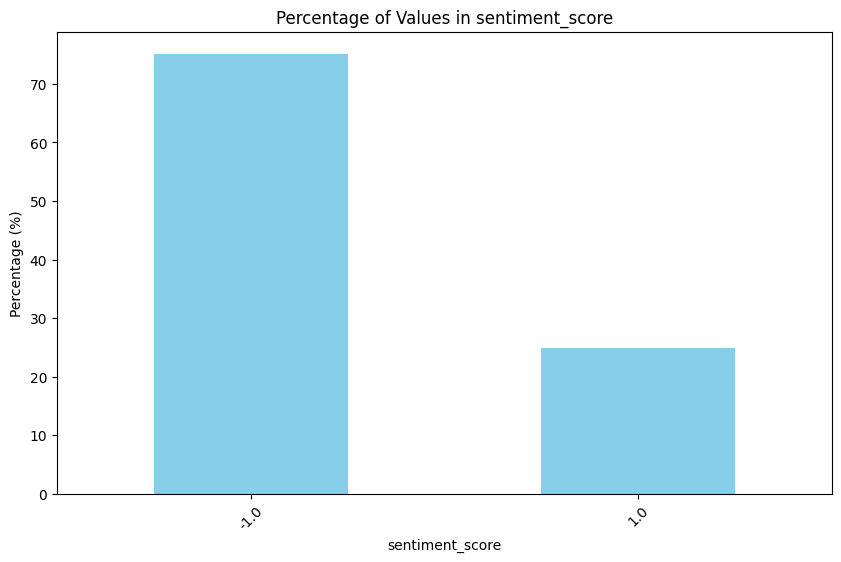

In [7]:
plot_percentage(dataset, 'sentiment_score')

## Splitting the dataset

In [8]:
train_eval, test = train_test_split(dataset, test_size=0.2, random_state=42, stratify=dataset['sentiment_score'])

In [9]:
train, eval = train_test_split(train_eval, test_size=0.1, random_state=42, stratify=train_eval['sentiment_score'])

In [10]:
train['sentiment_score'].value_counts()

-1.0    12307
 1.0     4065
Name: sentiment_score, dtype: int64

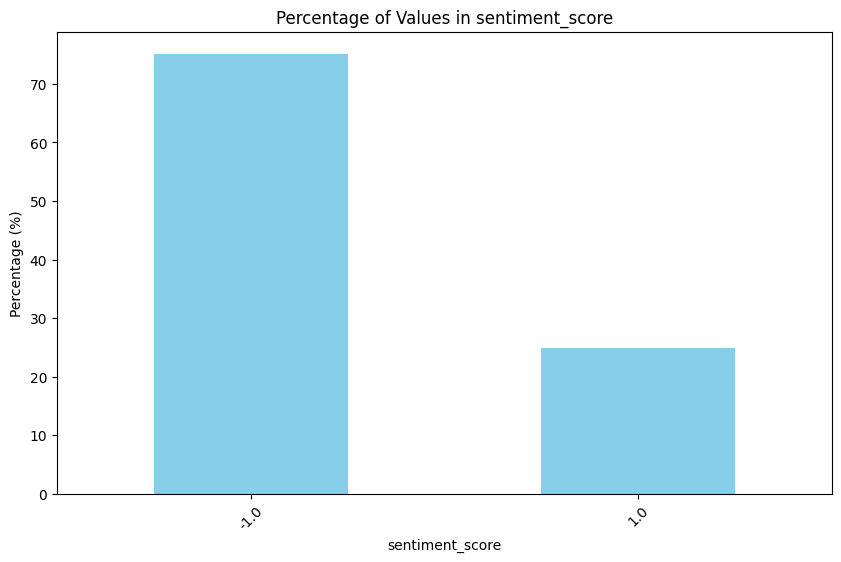

In [11]:
plot_percentage(train, 'sentiment_score')

In [12]:
eval['sentiment_score'].value_counts()

-1.0    1368
 1.0     452
Name: sentiment_score, dtype: int64

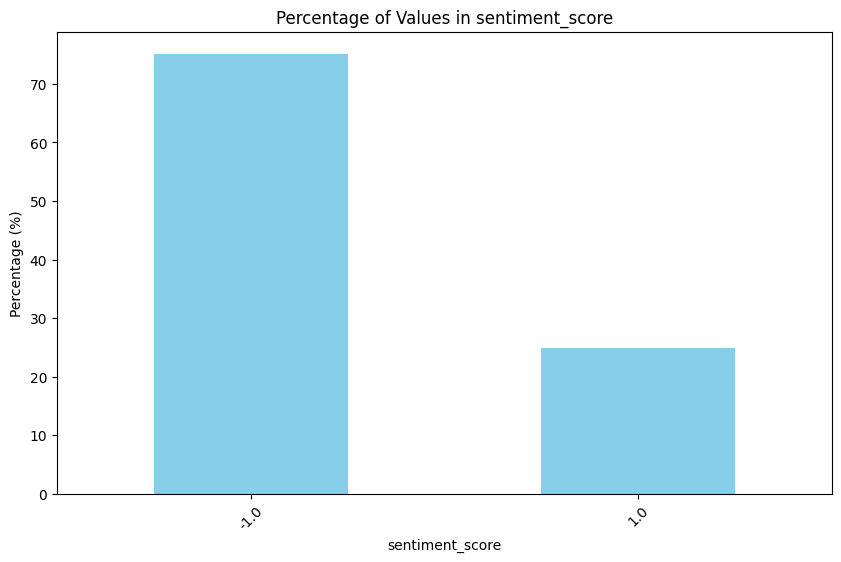

In [13]:
plot_percentage(eval, 'sentiment_score')

In [14]:
test['sentiment_score'].value_counts()

-1.0    3419
 1.0    1129
Name: sentiment_score, dtype: int64

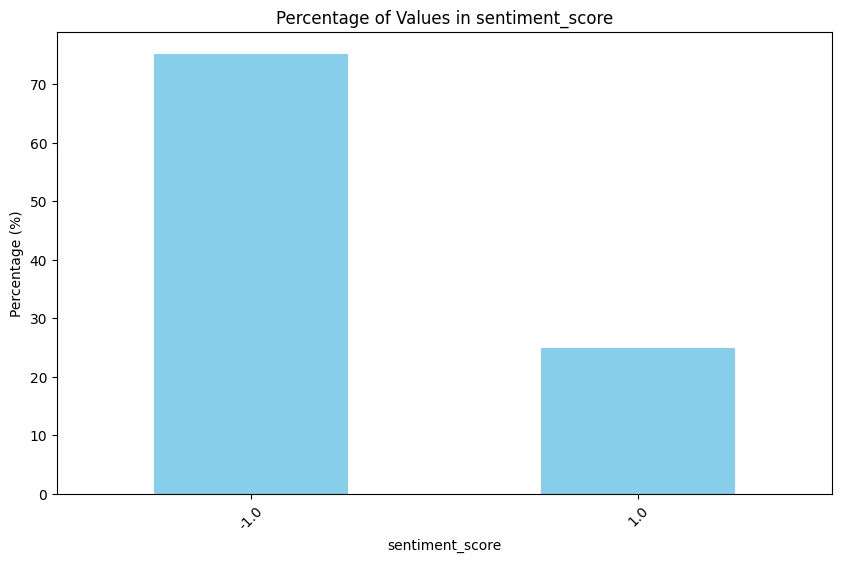

In [15]:
plot_percentage(test, 'sentiment_score')

In [16]:
train.to_csv('train.csv', index=False)

In [19]:
eval.to_csv('dev.csv', index=False)

In [18]:
test.to_csv('test.csv', index=False)